# Alien Apparition Rate

# Setting Up

In [1]:
import pandas as pd

alien_apparition = pd.read_csv("datasets/alien_apparition.csv")

## Data Cleanup

In [2]:
alien_apparition = alien_apparition.fillna(0)
alien_apparition = alien_apparition.set_index(["Race", "Month"])
alien_apparition.head()

,,Alien Research,Alien Harvest,Alien Abduction,Alien Infiltration,Alien Base,Alien Terror,Alien Retaliation
Race,Month,,,,,,,
sectoid,1,70.0,50.0,60.0,60.0,30.0,30.0,60.0
snakeman,1,10.0,20.0,0.0,20.0,20.0,0.0,20.0
ethereal,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
muton,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
floater,1,20.0,30.0,40.0,20.0,50.0,70.0,20.0


## Expected Alien by Month

In [3]:
alien_apparition_month = alien_apparition.swaplevel(0, 1)
alien_apparition_month["Chance"] = alien_apparition_month.mean(axis=1)
alien_apparition_month = alien_apparition_month[["Chance"]]
alien_apparition_month.head()

Chance
Month Race               
1     sectoid   51.428571
      snakeman  12.857143
      ethereal   0.000000
      muton      0.000000
      floater   35.714286

Lets check that all the apparition chances sum up to 100.

In [4]:
alien_apparition_month.groupby(["Month"]).sum()

,Chance
Month,
1,100.0
2,100.0
3,100.0
4,100.0
5,100.0
6,100.0
7,100.0
8,100.0
9,100.0


In [5]:
alien_apparition_by_month = alien_apparition_month.swaplevel(0, 1)
alien_apparition_by_month = alien_apparition_by_month.unstack(level=0)
alien_apparition_by_month = alien_apparition_by_month.sort_values(by=["Month"])
alien_apparition_by_month

Chance                                            
Race    ethereal    floater      muton    sectoid   snakeman
Month                                                       
1       0.000000  35.714286   0.000000  51.428571  12.857143
2       0.000000  41.428571   0.000000  47.142857  11.428571
3       0.000000  41.428571   0.000000  47.142857  11.428571
4       0.000000  27.142857  25.714286  25.714286  21.428571
5       0.000000  27.142857  25.714286  25.714286  21.428571
6       0.000000  27.142857  25.714286  25.714286  21.428571
7      15.714286  30.000000  24.285714  15.714286  14.285714
8      15.714286  30.000000  24.285714  15.714286  14.285714
9      15.714286  30.000000  24.285714  15.714286  14.285714
10     15.714286  24.285714  22.857143  24.285714  12.857143
11     15.714286  24.285714  22.857143  24.285714  12.857143
12     15.714286  24.285714  22.857143  24.285714  12.857143

Text(0, 0.5, 'Chance')

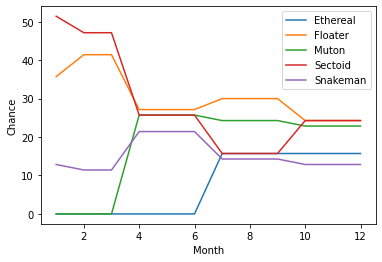

In [6]:
ax = alien_apparition_by_month.plot()
ax.legend(["Ethereal", "Floater", "Muton", "Sectoid", "Snakeman"]);
ax.set_xlabel("Month")
ax.set_ylabel("Chance")